    In this notebook we would create BOW and apply Naive Baye's(Bernoullis' and Multinomial)
    also apply tfidf

In [1]:
import warnings;
warnings.filterwarnings('ignore')

Loading the data

In [2]:
import pickle
with open('../data/clean-data.pkl','rb') as fp:
    X,Y = pickle.load(fp)
fp.close()

In [3]:
# counting 80% for train-test split
l = int(0.8*len(X))
pred = {}

### Creating BOW

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
m = CountVectorizer()
BOW_tr = m.fit_transform(X[:l])
BOW_ts = m.transform(X[l:])

### Multinomial NB

In [6]:
from sklearn.naive_bayes import MultinomialNB

In [7]:
m = MultinomialNB().fit(BOW_tr,Y[:l])
pred['Multinomial NB'] = m.predict(BOW_ts)

### Bernoullis NB

In [8]:
from sklearn.naive_bayes import BernoulliNB

In [9]:
m = BernoulliNB().fit(BOW_tr,Y[:l])
pred['Bernoullis NB'] = m.predict(BOW_ts)

### Logistic Regression (L1)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
m = LogisticRegression(C=1,penalty='l1',class_weight='balanced')
m.fit(BOW_tr,Y[:l])
pred['Logistic L1'] = m.predict(BOW_ts)

### Logistic Regression (L2)

In [12]:
m = LogisticRegression(C=1,penalty='l2',class_weight='balanced')
m.fit(BOW_tr,Y[:l])
pred['Logistic L2'] = m.predict(BOW_ts)

### Plotting ROC

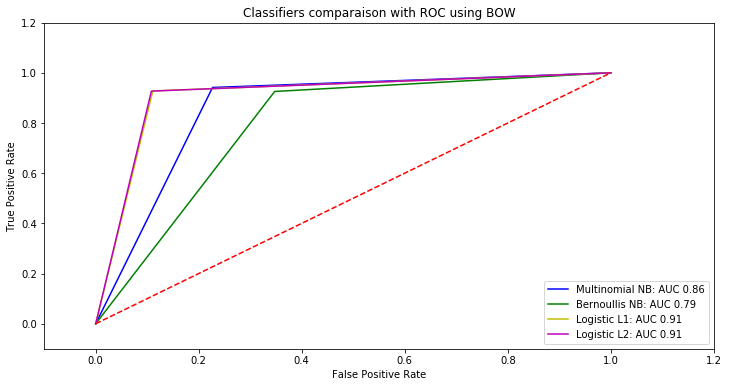

In [13]:

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

def formatt(x):
    return x;

vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']

for model, predicted in pred.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y[l:], vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC using BOW')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Observation without class weights: 
* LR with L2 reg: AUC 0.87
* Then Multinomial NB: AUC 0.86

### Using Tfidf

In [62]:
from sklearn.feature_extraction.text import TfidfTransformer

In [63]:
transformer = TfidfTransformer()
tfidf_tr = transformer.fit_transform(BOW_tr)

In [64]:
transformer = TfidfTransformer()
tfidf_ts = transformer.fit_transform(BOW_ts)

In [65]:
pred = {}

### Multinomial NB

In [66]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
m = MultinomialNB().fit(tfidf_tr,Y[:l])
pred['Multinomial NB'] = m.predict(tfidf_ts)

### Bernoullis NB

In [68]:
from sklearn.naive_bayes import BernoulliNB

In [69]:
m = BernoulliNB().fit(tfidf_tr,Y[:l])
pred['Bernoullis NB'] = m.predict(tfidf_ts)

### Logistic Regression (L1)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
m = LogisticRegression(C=2,penalty='l1')
m.fit(tfidf_tr,Y[:l])
pred['Logistic L1'] = m.predict(tfidf_ts)

### Logistic Regression (L2)

In [72]:
m = LogisticRegression(C=2,penalty='l2')
m.fit(tfidf_tr,Y[:l])
pred['Logistic L2'] = m.predict(tfidf_ts)

### Plotting ROC

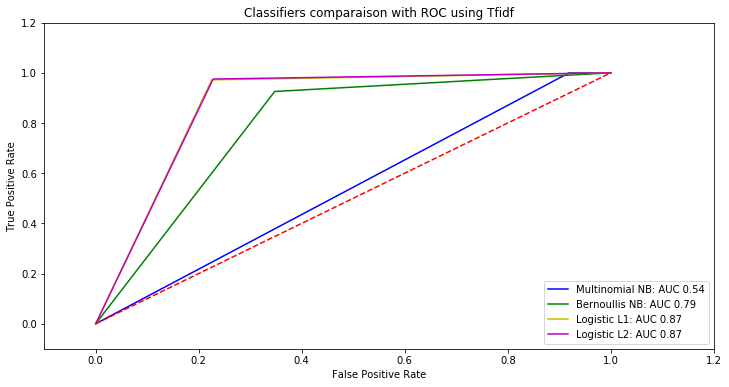

In [73]:

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

def formatt(x):
    return x;

vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']

for model, predicted in pred.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y[l:], vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC using Tfidf')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Observation:
* LR with tfidf gives AUC 0.87, without class weights(LR is the best algorithm with tfidf)
* 

### Conclusion
* Logistic Regression is the better classifier for this dataset than NB.
* The AUC doesn't change upon incresing 'C' from 2 for Logistic Regression.
* Bag of words featurization is also pretty good for this problem, almost as good as Logistic regression and better in case of Naive Bayes which is obvious.